<a href="https://colab.research.google.com/github/n9hquan/QR103/blob/main/QR_Poster_Group3_Session8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1577]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from google.colab import files
import io

In [1578]:
data = pd.read_csv("https://raw.githubusercontent.com/quynh-anh-bang/You-live-and-learn/main/gender_inequality.csv")

In [1662]:
data1 = data.dropna()

In [1580]:
gdp = pd.read_csv("https://raw.githubusercontent.com/n9hquan/QR103/main/GDP_Per_Capita.csv", on_bad_lines='skip',skiprows=4)

In [1581]:
gdpnew = gdp.loc[:,['Country Name','2015']]

In [1582]:
gdpnew = gdpnew.dropna()

In [1583]:
gdp_countries = gdpnew['Country Name']
gdp_countries = gdp_countries.tolist()

In [1584]:
gdp_2015 = gdp['2015']

In [1585]:
q1 = gdp_2015.quantile(0.25)
q3 = gdp_2015.quantile(0.75)
low_whisk = q1 - 1.5*(q3-q1)
upp_whisk = q3 + 2.5*(q3-q1)

(array([189.,  29.,  21.,  10.,   5.,   1.,   1.,   0.,   0.,   2.]),
 array([   289.35963328,  17294.21611122,  34299.07258916,  51303.92906709,
         68308.78554503,  85313.64202297, 102318.4985009 , 119323.35497884,
        136328.21145678, 153333.06793471, 170337.92441265]),
 <BarContainer object of 10 artists>)

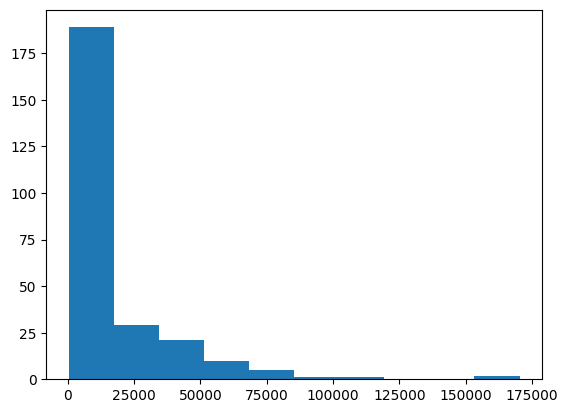

In [1586]:
plt.hist(gdp_2015)

In [1663]:
data2 = data1.dropna()

In [1665]:
data2

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),Gender gap (Secondary Education),Gender gap (Labour participation)
0,1.0,Norway,0.067,4,7.8,39.6,97.4,96.7,61.2,68.7,0.7,-7.5
1,2.0,Australia,0.11,6,12.1,30.5,94.3,94.6,58.8,71.8,-0.3,-13.0
2,3.0,Switzerland,0.028,6,1.9,28.5,95,96.6,61.8,74.9,-1.6,-13.1
3,4.0,Denmark,0.048,5,5.1,38,95.5,96.6,58.7,66.4,-1.1,-7.7
4,5.0,Netherlands,0.062,6,6.2,36.9,87.7,90.5,58.5,70.6,-2.8,-12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
182,183.0,Burkina Faso,0.631,400,115.4,13.3,0.9,3.2,77.1,90,-2.3,-12.9
183,184.0,Burundi,0.492,740,30.3,34.9,5.3,8.3,83.3,82,-3.0,1.3
184,185.0,Chad,0.706,980,152,14.9,1.7,9.9,64,79.2,-8.2,-15.2
186,187.0,Central African Republic,0.655,880,98.3,12.5,10.1,26.7,72.6,85.1,-16.6,-12.5


#Edu

In [1666]:
# female_edu_US = data[data['Country'] == 'United States']['Population with Secondary Education (Female)']
female_edu_world = data['Population with Secondary Education (Female)']
female_edu_world

0      97.4
1      94.3
2        95
3      95.5
4      87.7
       ... 
182     0.9
183     5.3
184     1.7
186    10.1
187     2.4
Name: Population with Secondary Education (Female), Length: 159, dtype: object

In [1667]:
# male_edu_US = data[data['Country'] == 'United States']['Population with Secondary Education (Male)']
male_edu_world = data['Population with Secondary Education (Male)']
male_edu_world

0      96.7
1      94.6
2      96.6
3      96.6
4      90.5
       ... 
182     3.2
183     8.3
184     9.9
186    26.7
187     7.8
Name: Population with Secondary Education (Male), Length: 159, dtype: object

In [1668]:
female_edu_1 = data.loc[:,['Country','Population with Secondary Education (Female)']]
female_edu_1 = female_edu_1.dropna()

In [1669]:
female_edu_1

,Country,Population with Secondary Education (Female)
0,Norway,97.4
1,Australia,94.3
2,Switzerland,95
3,Denmark,95.5
4,Netherlands,87.7
...,...,...
182,Burkina Faso,0.9
183,Burundi,5.3
184,Chad,1.7
186,Central African Republic,10.1


In [1670]:
male_edu_1 = data.loc[:,['Country','Population with Secondary Education (Male)']]
male_edu_1 = male_edu_1.dropna()

In [1671]:
female_edu_val=female_edu_1['Population with Secondary Education (Female)']
female_edu_val = pd.to_numeric(female_edu_val,errors ='coerce')
male_edu_val=male_edu_1['Population with Secondary Education (Male)']
male_edu_val = pd.to_numeric(male_edu_val,errors ='coerce')

In [1672]:
female_edu_val

0      97.4
1      94.3
2      95.0
3      95.5
4      87.7
       ... 
182     0.9
183     5.3
184     1.7
186    10.1
187     2.4
Name: Population with Secondary Education (Female), Length: 159, dtype: float64

In [1673]:
male_edu_val

0      96.7
1      94.6
2      96.6
3      96.6
4      90.5
       ... 
182     3.2
183     8.3
184     9.9
186    26.7
187     7.8
Name: Population with Secondary Education (Male), Length: 159, dtype: float64

In [1674]:
female_countries = female_edu_1['Country']
female_countries = female_countries.tolist()

In [1675]:
female_edu_world = data['Population with Secondary Education (Female)']
male_edu_world = data['Population with Secondary Education (Male)']
female_edu_dropna = pd.to_numeric(female_edu_world, errors ='coerce')
male_edu_dropna = pd.to_numeric(male_edu_world, errors ='coerce')
female_edu = female_edu_dropna.dropna()
male_edu = male_edu_dropna.dropna()
st.ttest_ind(female_edu, male_edu)

Ttest_indResult(statistic=-1.6312325579385671, pvalue=0.10383744245451487)

In [1676]:
data['Gender gap (Secondary Education)'] = female_edu_val - male_edu_val

<ipython-input-1676-30cbc04de68c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender gap (Secondary Education)'] = female_edu_val - male_edu_val


In [1677]:
data[data['Gender gap (Secondary Education)']>0] #n=34

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),Gender gap (Secondary Education),Gender gap (Labour participation)
0,1.0,Norway,0.067,4,7.8,39.6,97.4,96.7,61.2,68.7,0.7,-7.5
6,6.0,Ireland,0.113,9,8.2,19.9,80.5,78.6,53.1,68.1,1.9,-15.0
7,8.0,United States,0.28,28,31,19.4,95.1,94.8,56.3,68.9,0.3,-12.6
19,20.0,Japan,0.133,6,5.4,11.6,87,85.8,48.8,70.4,1.2,-21.6
27,28.0,Czech Republic,0.091,5,4.9,18.9,99.9,99.7,51.1,68.3,0.2,-17.2
32,32.0,Qatar,0.524,6,9.5,0,66.7,59,50.8,95.5,7.7,-44.7
40,41.0,United Arab Emirates,0.232,8,27.6,17.5,73.1,61.2,46.5,92,11.9,-45.5
44,45.0,Bahrain,0.265,22,13.8,15,56.7,51.4,39.2,86.9,5.3,-47.7
53,52.0,Uruguay,0.313,14,58.3,11.5,54.4,50.3,55.6,76.8,4.1,-21.2
54,55.0,Bahamas,0.298,37,28.5,16.7,91.2,87.6,69.3,79.3,3.6,-10.0


In [1678]:
data[data['Gender gap (Secondary Education)']<0] #n=130

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),Gender gap (Secondary Education),Gender gap (Labour participation)
1,2.0,Australia,0.11,6,12.1,30.5,94.3,94.6,58.8,71.8,-0.3,-13.0
2,3.0,Switzerland,0.028,6,1.9,28.5,95,96.6,61.8,74.9,-1.6,-13.1
3,4.0,Denmark,0.048,5,5.1,38,95.5,96.6,58.7,66.4,-1.1,-7.7
4,5.0,Netherlands,0.062,6,6.2,36.9,87.7,90.5,58.5,70.6,-2.8,-12.1
5,6.0,Germany,0.041,7,3.8,36.9,96.3,97,53.6,66.4,-0.7,-12.8
...,...,...,...,...,...,...,...,...,...,...,...,...
182,183.0,Burkina Faso,0.631,400,115.4,13.3,0.9,3.2,77.1,90,-2.3,-12.9
183,184.0,Burundi,0.492,740,30.3,34.9,5.3,8.3,83.3,82,-3.0,1.3
184,185.0,Chad,0.706,980,152,14.9,1.7,9.9,64,79.2,-8.2,-15.2
186,187.0,Central African Republic,0.655,880,98.3,12.5,10.1,26.7,72.6,85.1,-16.6,-12.5


In [1679]:
data

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),Gender gap (Secondary Education),Gender gap (Labour participation)
0,1.0,Norway,0.067,4,7.8,39.6,97.4,96.7,61.2,68.7,0.7,-7.5
1,2.0,Australia,0.11,6,12.1,30.5,94.3,94.6,58.8,71.8,-0.3,-13.0
2,3.0,Switzerland,0.028,6,1.9,28.5,95,96.6,61.8,74.9,-1.6,-13.1
3,4.0,Denmark,0.048,5,5.1,38,95.5,96.6,58.7,66.4,-1.1,-7.7
4,5.0,Netherlands,0.062,6,6.2,36.9,87.7,90.5,58.5,70.6,-2.8,-12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
182,183.0,Burkina Faso,0.631,400,115.4,13.3,0.9,3.2,77.1,90,-2.3,-12.9
183,184.0,Burundi,0.492,740,30.3,34.9,5.3,8.3,83.3,82,-3.0,1.3
184,185.0,Chad,0.706,980,152,14.9,1.7,9.9,64,79.2,-8.2,-15.2
186,187.0,Central African Republic,0.655,880,98.3,12.5,10.1,26.7,72.6,85.1,-16.6,-12.5


#Labour

In [1680]:
female_labour_world = data['Labour Force Participation Rate (Female)']
female_labour_world

0      61.2
1      58.8
2      61.8
3      58.7
4      58.5
       ... 
182    77.1
183    83.3
184      64
186    72.6
187      40
Name: Labour Force Participation Rate (Female), Length: 159, dtype: object

In [1681]:
male_labour_world = data['Labour Force Participation Rate (Male)']
male_labour_world

0      68.7
1      71.8
2      74.9
3      66.4
4      70.6
       ... 
182      90
183      82
184    79.2
186    85.1
187    89.7
Name: Labour Force Participation Rate (Male), Length: 159, dtype: object

In [1682]:
female_labour_dropna = pd.to_numeric(female_labour_world, errors ='coerce')

In [1683]:
male_labour_dropna = pd.to_numeric(male_labour_world, errors ='coerce')

In [1684]:
female_labour = female_labour_dropna.dropna()

In [1685]:
male_labour = male_labour_dropna.dropna()

##T-test & Mann-Whitney U test

In [1686]:
st.shapiro(female_labour)

ShapiroResult(statistic=0.9750053882598877, pvalue=0.0055217985063791275)

In [1687]:
st.shapiro(male_labour)

ShapiroResult(statistic=0.991295576095581, pvalue=0.4432721436023712)

In [1688]:
st.ttest_ind(female_labour, male_labour)

Ttest_indResult(statistic=-15.100509334519545, pvalue=3.642752783881433e-39)

In [1689]:
st.mannwhitneyu(female_labour, male_labour)

MannwhitneyuResult(statistic=2775.0, pvalue=2.3634687307850188e-33)

In [1690]:
data['Gender gap (Labour participation)'] = female_labour_dropna - male_labour_dropna

<ipython-input-1690-52644ad28f49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender gap (Labour participation)'] = female_labour_dropna - male_labour_dropna


In [1691]:
data

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),Gender gap (Secondary Education),Gender gap (Labour participation)
0,1.0,Norway,0.067,4,7.8,39.6,97.4,96.7,61.2,68.7,0.7,-7.5
1,2.0,Australia,0.11,6,12.1,30.5,94.3,94.6,58.8,71.8,-0.3,-13.0
2,3.0,Switzerland,0.028,6,1.9,28.5,95,96.6,61.8,74.9,-1.6,-13.1
3,4.0,Denmark,0.048,5,5.1,38,95.5,96.6,58.7,66.4,-1.1,-7.7
4,5.0,Netherlands,0.062,6,6.2,36.9,87.7,90.5,58.5,70.6,-2.8,-12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
182,183.0,Burkina Faso,0.631,400,115.4,13.3,0.9,3.2,77.1,90,-2.3,-12.9
183,184.0,Burundi,0.492,740,30.3,34.9,5.3,8.3,83.3,82,-3.0,1.3
184,185.0,Chad,0.706,980,152,14.9,1.7,9.9,64,79.2,-8.2,-15.2
186,187.0,Central African Republic,0.655,880,98.3,12.5,10.1,26.7,72.6,85.1,-16.6,-12.5


Text(0, 0.5, 'Gender gap (Labour participation)')

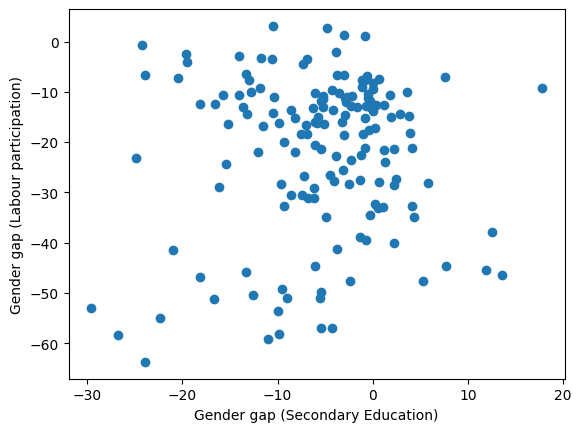

In [1692]:
plt.scatter(data['Gender gap (Secondary Education)'],data['Gender gap (Labour participation)'])
plt.xlabel('Gender gap (Secondary Education)')
plt.ylabel('Gender gap (Labour participation)')

In [1693]:
data=data.dropna()

In [1694]:
edu_gap = data['Gender gap (Secondary Education)']
edu_gap = edu_gap.to_numpy()
labor_gap = data['Gender gap (Labour participation)']
labor_gap = labor_gap.to_numpy()
np.corrcoef(edu_gap,labor_gap)

array([[1.        , 0.08381528],
       [0.08381528, 1.        ]])

In [1695]:
edu_gap

array([  0.7,  -0.3,  -1.6,  -1.1,  -2.8,  -0.7,   1.9,   0.3,   0. ,
        -0.3,  -6.9,  -7. ,  -0.8,  -0.1,  -0.6, -12.1,  -2.9,   0. ,
         1.2,  -5.4,  -5.2,   0. ,   0. ,  -2.2,  -6.3,  -9.3,   0.2,
        -7.5,   0. ,  -3.9,  -5.7,   7.7,  -0.4,  -6.1,  -5.2,  -9.6,
        -9.8,  -1.3,  11.9,  -3.1,  -0.5,  -0.8,   5.3,  -0.1,  -8.6,
        -0.7, -10.5,  -5.2,  -2.9,  -9.9,  -5.9,   4.1,   3.6,  -3.5,
         1.8,  -2.7,   4.1,  -6.2,  -8.6,  -1.2, -15.2,  -4.5,  -2.4,
         0.2,  -5.4,   5.8, -21. ,  -3.7,  -4.9,   2.2,  -3. ,  -3.7,
        -9. , -15.4,  -4.2,  -4.3,  -9.8,  -6.1,  -1. , -24.9,   0.7,
       -13.2,  -0.3,   1.2,  -5.1,  13.6, -13.3,   1.3,   3.8,  -0.8,
         0.6,   2.5,  -2.5,  -5.4,   4.3,  -4.3,  -3. , -16.7,  17.8,
        -9.3,  -6.2,  -5.5,   2.2,  -6.8,  -3.2, -11.8, -11.5,  -2.3,
       -22.4,  12.5,   1.1,  -9.5,  -1.1,  -1.3,   3.9, -29.6,   2.2,
        -0.5, -11. ,  -7.3, -18.2, -19.5, -14.1,  -7.2, -13. ,  -6.1,
       -20.5, -26.8,

In [1696]:
#for running regression

# edu_gap = data['Gender gap (Secondary Education)']
# labor_gap = data['Gender gap (Labour participation)']
# import statsmodels.formula.api as smf
# reg = smf.ols(formula='')

In [1697]:
female_labour_Saudi = data[data['Country'] == 'Saudi Arabia']['Labour Force Participation Rate (Female)']
female_labour_Saudi = pd.to_numeric(female_labour_Saudi, errors='coerce')

male_labour_Saudi = data[data['Country'] == 'Saudi Arabia']['Labour Force Participation Rate (Male)']
male_labour_Saudi = pd.to_numeric(male_labour_Saudi, errors='coerce')
st.ttest_ind(female_labour_Saudi,male_labour_Saudi)

<ipython-input-1697-de8782c786b1>:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  st.ttest_ind(female_labour_Saudi,male_labour_Saudi)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


Ttest_indResult(statistic=nan, pvalue=nan)

##The graph we will show

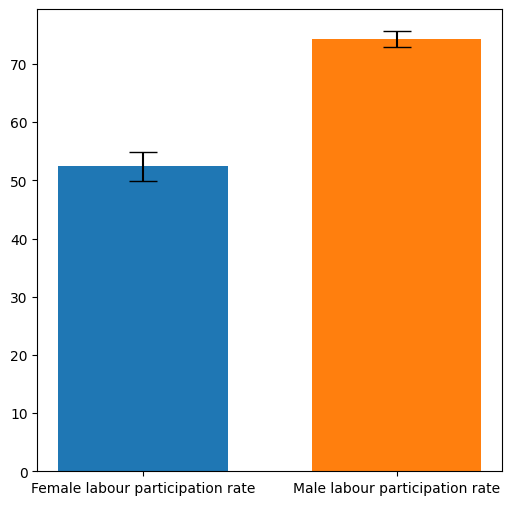

In [1698]:
ci1 = st.norm.interval(0.95, loc=female_labour_dropna.mean(),scale=female_labour_dropna.sem())
ci1
ci2 = st.norm.interval(0.95, loc=male_labour_dropna.mean(),scale=male_labour_dropna.sem())
ci2
plt.figure(figsize=(6,6))
plt.bar(1, female_labour_dropna.mean(), width = 0.1, capsize=10, yerr = (ci1[1]-ci1[0])/2)
plt.bar(1.15, male_labour_dropna.mean(), width = 0.1, capsize=10, yerr = (ci2[1]-ci2[0])/2)
plt.xticks([1,1.15],['Female labour participation rate','Male labour participation rate'])
plt.show()

#Regression

##GDP -> common

In [1699]:
common_countries = []

In [1700]:
for i in range(len(female_countries)):
  if female_countries[i] in gdp_countries:
     common_countries.append(female_countries[i])

In [1701]:
common_countries_gdp = []
gdp_15=gdpnew['2015'].tolist()

In [1702]:
for i in range(len(common_countries)):
  if common_countries[i] in gdp_countries:
     common_countries_gdp.append(gdp_15[i])

In [1703]:
common_countries_gdp

[28421.3864931862,
 1538.55226805656,
 592.476537451681,
 1876.62348318848,
 3100.83068530533,
 3952.80253807527,
 38885.3760140905,
 6245.78778494805,
 41525.1389031283,
 13789.060424772,
 3666.1418758065,
 13101.5418159165,
 14861.8827074704,
 56710.4457244504,
 44195.8175947748,
 5500.31038244408,
 289.359633280865,
 41008.296719472,
 1041.65252315983,
 632.12668368394,
 1236.00506049059,
 7074.68102325059,
 22795.4488576612,
 30206.2404347372,
 4599.90102879933,
 5967.05220384914,
 6142.47883269283,
 102005.62564189,
 2975.64881137847,
 8783.22598387817,
 16990.2194668498,
 30681.6794391894,
 2695.63877250025,
 5869.73294292043,
 351.879753579186,
 43596.1355365546,
 12520.3364891967,
 83806.4476003837,
 13569.9478008231,
 8016.43143498352,
 1941.56633627815,
 1399.67533119236,
 482.0645483336,
 2347.81849884859,
 6228.4262990412,
 1322.93669549676,
 2891.88448249992,
 11529.9545258398,
 10473.834450072,
 7683.75789050585,
 19260.269845345,
 77298.6280551844,
 23487.125,
 17829.698

In [1704]:
common_countries_gdp=pd.Series(common_countries_gdp)

In [1705]:
len(common_countries_gdp)

136

##Female -> common

In [1706]:
common_female_edu_countries = []

In [1707]:
for i in range(len(female_countries)):
  if female_countries[i] in common_countries:
     common_female_edu_countries.append(female_countries[i])

In [1708]:
female_edu_1_dropna = female_edu_1.dropna()

In [1709]:
female_edu_1_dropna

,Country,Population with Secondary Education (Female)
0,Norway,97.4
1,Australia,94.3
2,Switzerland,95
3,Denmark,95.5
4,Netherlands,87.7
...,...,...
182,Burkina Faso,0.9
183,Burundi,5.3
184,Chad,1.7
186,Central African Republic,10.1


In [1710]:
common_female_edu_values = []
common_female_edu_values1 = pd.to_numeric(female_edu_1['Population with Secondary Education (Female)'],errors ='coerce')
common_female_edu_values1 = common_female_edu_values1.tolist()

In [1711]:
type(common_female_edu_values1)

list

In [1712]:
len(common_female_edu_values1)

159

In [1713]:
female_edu_1_countries = female_edu_1['Country']
female_edu_1_countries = female_edu_1_countries.tolist()

In [1714]:
for i in range(len(common_female_edu_countries)):
  if common_female_edu_countries[i] in female_edu_1_countries:
    common_female_edu_values.append(common_female_edu_values1[i])

In [1715]:
len(common_female_edu_values)

136

In [1716]:
loggdp = np.log(common_countries_gdp)

We can see from the histogram that GDP per capita is highly right-skewed, so we use log GDP per capita to make it follow the normal distribution (We ran the Shapiro test on log GDP per capita and got a p-value greater than 0.05).

(array([ 3., 10., 18., 14., 23., 22., 12., 24.,  8.,  2.]),
 array([ 5.66767032,  6.30395965,  6.94024897,  7.5765383 ,  8.21282762,
         8.84911695,  9.48540627, 10.1216956 , 10.75798492, 11.39427425,
        12.03056357]),
 <BarContainer object of 10 artists>)

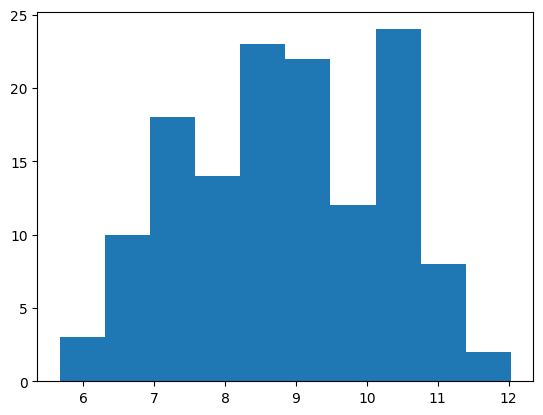

In [1717]:
plt.hist(loggdp)

In [1718]:
st.shapiro(loggdp)

ShapiroResult(statistic=0.980697751045227, pvalue=0.05091463774442673)

In [1719]:
# female_labour_new = female_labour.replace([np.inf, -np.inf], np.nan)
# female_labour_new.dropna(inplace=True)

In [1720]:
female_labour_1 = data.loc[:,['Country','Labour Force Participation Rate (Female)']]
female_labour_1 = female_labour_1.dropna()

In [1721]:
female_labour_countries = female_labour_1['Country']
female_labour_countries = female_labour_countries.tolist()

In [1722]:
common_female_labour_countries = []

In [1723]:
for i in range(len(female_labour_countries)):
  if female_labour_countries[i] in common_countries:
     common_female_labour_countries.append(female_labour_countries[i])

In [1724]:
common_female_labour_values = []
common_female_labour_values1 = pd.to_numeric(female_labour_1['Labour Force Participation Rate (Female)'],errors ='coerce')
common_female_labour_values1 = common_female_labour_values1.tolist()

In [1725]:
female_labour_1_countries = female_labour_1['Country']
female_labour_1_countries = female_labour_1_countries.tolist()

In [1726]:
for i in range(len(common_female_labour_countries)):
  if common_female_labour_countries[i] in female_labour_1_countries:
    common_female_labour_values.append(common_female_labour_values1[i])

In [1727]:
len(common_female_labour_values)

136

In [1729]:
# for i in range(len(common_female_edu_values)):
#   if str(common_female_edu_values[i]) == "nan":
#     common_female_edu_values[i] = 0

In [1730]:
# count = 0

In [1731]:
# for i in range(len(common_female_edu_values)):
#   if common_female_edu_values[i] == 0:
#     count += 1

In [1732]:
len(common_female_edu_values)

136

In [1733]:
# dem =0
# i = 0

In [1734]:
# while dem < 21:
#   if common_female_edu_values[i] == 0:
#     common_female_edu_values.remove(common_female_edu_values[i])
#     dem += 1
#   else:
#     i += 1

In [1738]:
import statsmodels.api as sm
loggdp = np.log(common_countries_gdp)
X = np.column_stack((common_female_edu_values, loggdp, loggdp**2))
X = sm.add_constant(X)
model1 = sm.RLM(common_female_labour_values,X) # model1 = sm.RLM(logincome,X) # robust model
reg1 = model1.fit()
print(reg1.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  136
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 19 May 2023                                         
Time:                        07:05:08                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.8276     42.733      1.283      0.1

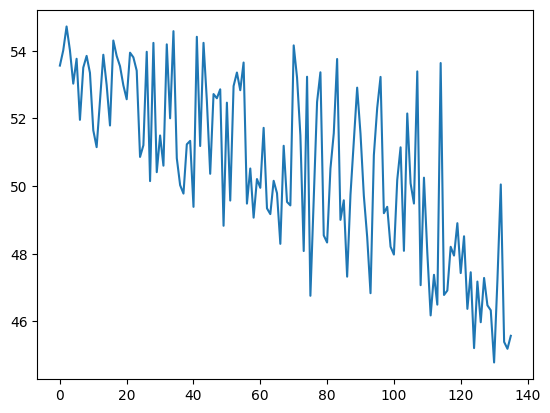

In [1747]:
x1 = np.linspace(5, 13, 1)
plt.plot(reg1.fittedvalues)

In [1739]:
# np.any(~np.isfinite(common_female_labour_values),axis=0)

#References

GDP per capita (current US$). World Bank Open Data. (n.d.). https://data.worldbank.org/indicator/NY.GDP.PCAP.CD 

Mammen, K., & Paxson, C. (2000). Women's work and economic development. Journal of economic perspectives, 14(4), 141-164.

Program, U. N. D. (2017, January 25). Human development report 2015. Kaggle. https://www.kaggle.com/datasets/undp/human-development?select=gender_development.csv